<br>
<b>
    <font size="10" face="verdana">AI Fall 98 Project 4</font>
</b>
<hr>

## By Parsa Hoseininejad

## Introduction
In our world, most of industries use different artificial intelligence methods to improve their benefits. For instance, big stores extract beneficial data from earlier customer purchases. In this project we to build a mechanism to guess if a customer will return to the same store based on his/her previous purchases. We use machine learning algorithms to do this task.<br>

## Definition of Question
To predict if a customer will return to a certain shop or not, a model should be built that gets some data and determins the asked attribute. To build this model, a dataset of purchases with their answer is needed to train the model. This data set consists of customer ID, total quantity of purchase, total price of purchase, country, date, whether the customer came back and purchase count.<br>
There are multiple approaches to build a model based on this data set which will be implemented and compared in further parts.

## Phase 1
<hr>

### Dataset Preprocessing
To turn this data set to useful data, three major steps are done:<br>
1. __Date processing__: Date given in the data set is a string which contains day, month and year of purchase. As we know, this string should be converted to numeric data to build a model based on it. To reach this goal, <code>datetime</code> library is used to extract some data from the date string. After creating the date object, day, month, year and day of week are added to the dataframe. These attributes can help us determine if a customer will return to the store or not. For instance, if the purchase is done in the last months of a year, it is porobabale that the customer won't return to the store.
2. __Data Scaling__: In many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude. In this project, <code>MinMaxScaler</code>. The scaled version of each data is calculated by this formula:
<img src="scaler.png" width="150"/>
3. __One Hot Encoding__: In order to process categorical data, Country column in this case, it should be converted to numeric data. One approach is to use one hot encoding which adds a column for each category and determins that category by 0 and 1 values. The drawback of this approach is that it would take a lot of memory since there are multiple columns added to the table. Another approach is to use label encoding. In this approach, each category will be labeled with an integer bigger than 0. The problem here is that different categories will get different numeric numbers and the model would be trained based on this value which is not desired. Thus, one hot encoding is used.
4. __Dropping Columns__: The customer id column is dropped because it can't be used to determine the wanted attribute and using it to develop the model could be misleading.

In [1]:
import pandas as pd
import datetime
from sklearn import feature_selection
import sklearn
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('data.csv', delimiter = ',')
data.dropna(inplace=True)

data['Date']= pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['Day of Week'] = data['Date'].dt.dayofweek

data['Is Back'] = data['Is Back'] == 'Yes'

data = pd.get_dummies(data, prefix='Country')
data.drop(columns=['Date', 'Unnamed: 0', 'Customer ID'], inplace=True)
# data = data[(data >= 0).all(1)]

scaler = MinMaxScaler()
data[['Year', 'Total Quantity', 'Total Price', 'Purchase Count', 'Day', 'Month', 'Day of Week']] = scaler.fit_transform(data[['Year', 'Total Quantity', 'Total Price', 'Purchase Count', 'Day', 'Month', 'Day of Week']])

data

,Total Quantity,Total Price,Is Back,Purchase Count,Month,Day,Year,Day of Week,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0.427352,0.052612,False,0.005181,1.000000,0.033333,0.0,0.500000,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.431279,0.052793,True,0.098446,0.818182,1.000000,1.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.441005,0.052823,True,0.170984,0.363636,0.566667,1.0,0.333333,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.445616,0.052729,False,0.321244,0.818182,0.500000,1.0,1.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.428630,0.052774,True,0.082902,0.000000,0.533333,1.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,0.430046,0.052878,False,0.025907,0.181818,0.633333,1.0,1.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
4362,0.453973,0.052689,True,0.321244,0.818182,0.333333,1.0,0.166667,0,0,...,0,0,0,0,0,1,0,0,0,0
4363,0.437945,0.052812,True,0.082902,0.545455,0.800000,1.0,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
4364,0.430000,0.052845,True,0.041451,0.363636,0.833333,1.0,0.500000,0,0,...,0,0,0,0,0,0,0,0,1,0


### Information Gain
In information theory and machine learning, information gain is the amount of information gained about a random variable or signal from observing another random variable. As observed in the information gain plot, the __Is Back__ attribute is more realated to some attributes such as month and year. However, some other attributes such as total quantity have low information gains and thus could be dropped from table.

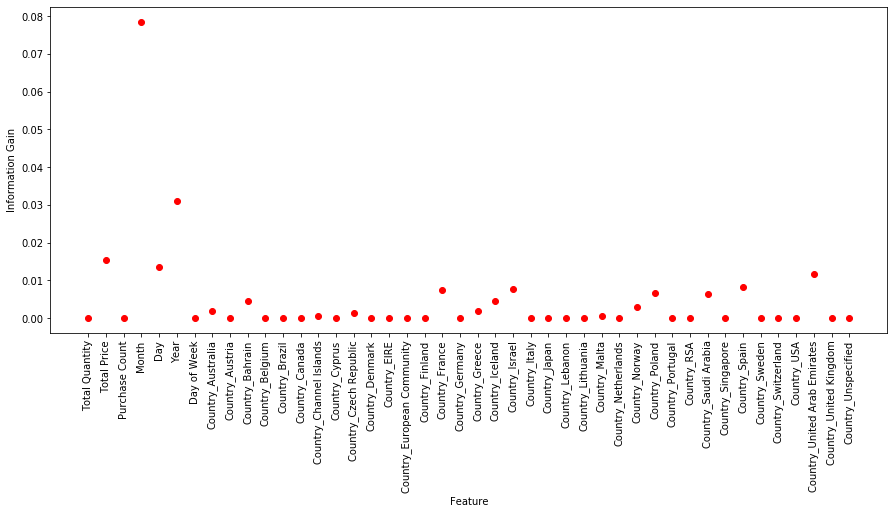

In [2]:
import matplotlib.pyplot as plt
import numpy as np

temp = data.drop(columns=['Is Back'])
plt.figure(figsize=(15,6))
plt.plot(sklearn.feature_selection.mutual_info_classif(data.drop(columns=['Is Back']), data['Is Back']), 'ro')
plt.xticks(np.arange(len(list(temp.columns.values))), list(temp.columns.values), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.show()

### Data Spliting
The data is split into two parts. One part is used to build and train the model and one part is used to evaluate the built model. The <code>random_state</code> attribute is set to a number to increase the accuracies and removing randomness.

In [3]:
from sklearn.model_selection import train_test_split

trainData, testData, trainAns, testAns = train_test_split(data.drop(columns=['Is Back']), data['Is Back'], test_size=0.25, random_state=32)
trainData

,Total Quantity,Total Price,Purchase Count,Month,Day,Year,Day of Week,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
783,0.432055,0.052793,0.186528,1.000000,0.600000,0.0,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1918,0.429452,0.052845,0.036269,0.181818,0.566667,1.0,0.666667,0,0,0,...,0,0,0,0,0,0,0,0,1,0
477,0.432283,0.053357,0.046632,1.000000,0.133333,0.0,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
414,0.427397,0.052812,0.227979,0.454545,0.166667,1.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2734,0.433516,0.052725,0.176166,0.454545,0.366667,1.0,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.443836,0.053254,0.041451,0.272727,0.400000,1.0,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2940,0.428721,0.053069,0.025907,0.272727,0.433333,1.0,0.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1334,0.439726,0.052753,0.098446,1.000000,0.233333,0.0,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1579,0.436712,0.052690,0.170984,1.000000,0.133333,0.0,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Phase 2
<hr>

### Decision Tree
In this part the model is built based on decision tree model. The accuracy plot shows that when the depth is increased more than a threshold, overfitting will occur. Overfitting happens because the leaves of the tree will contain less nodes and the model will be trained to give better answers for the trained data. However, because of overfitting, the test data accuracy is decreasing. As seen in the plot, after the depth of 4, the accuracy of the test data is decreasing and the accuracy of train data is increasing which is showing that overfitting is occuring. To build the best decision tree model, the best depth for test data accuracy is chosen and the model is built using this depth.

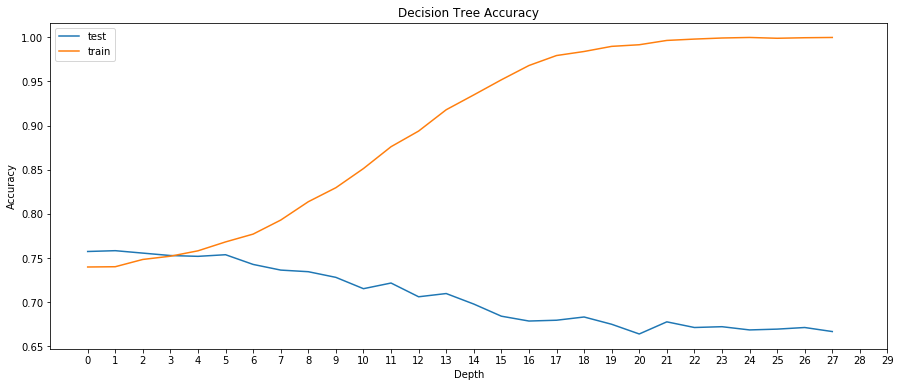

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
testAccuracies = []
trainAccuracies = []
for i in range(2, 30):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(trainData, trainAns)
    dtcPrediction = dtc.predict(testData)
    testAccuracies.append(metrics.accuracy_score(testAns, dtcPrediction))
    
    dtcPrediction = dtc.predict(trainData)
    trainAccuracies.append(metrics.accuracy_score(trainAns, dtcPrediction))
    
plt.figure(figsize=(15,6))
plt.plot(testAccuracies, label='test')
plt.plot(trainAccuracies, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy')
plt.legend()
plt.show()

In [5]:
dtc = DecisionTreeClassifier(max_depth=testAccuracies.index(max(testAccuracies))+1)
dtc = dtc.fit(trainData, trainAns)
dtcPrediction = dtc.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, dtcPrediction))
print('Precision:', metrics.precision_score(testAns, dtcPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, dtcPrediction, average='weighted'))

Accuracy:  0.7573260073260073
Precision: 0.7468907610019933
Recall:    0.7573260073260073


### KNN
To build the best KNN model, different <code>n_neighbors</code> are tested. As seen in the accuracy plot, when using 1 neighbor, overfitting will occur. This happens because the model is predicting the output by considering the nearest neighbor. In this case, the train data accuracy would be 100%. However, the test data accuracy is not good enough. As the neighbors increase to some threshold, the accuracy of the test data would increase. To build the best model, the number of neighbors will be chosen which will maximize the test data accuracy.

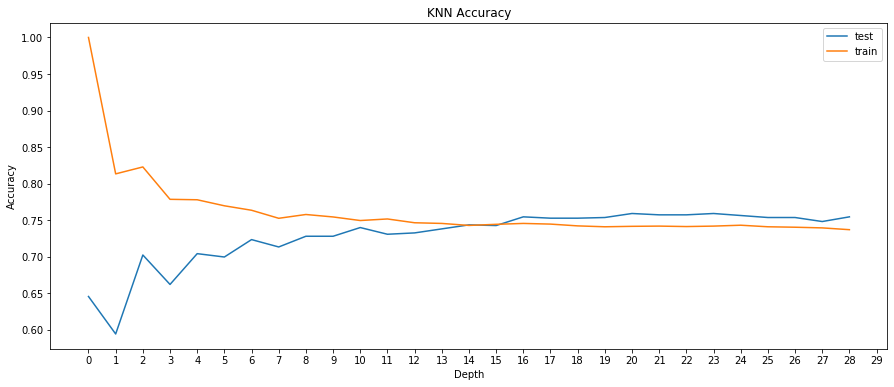

In [6]:
from sklearn.neighbors import KNeighborsClassifier

testAccuracies = []
trainAccuracies = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(trainData, trainAns)
    knnPrediction = knn.predict(testData)
    testAccuracies.append(metrics.accuracy_score(testAns, knnPrediction))
    
    knnPredictions = knn.predict(trainData)
    trainAccuracies.append(metrics.accuracy_score(trainAns, knnPredictions))
    
plt.figure(figsize=(15,6))
plt.plot(testAccuracies, label='test')
plt.plot(trainAccuracies, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.legend()
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=testAccuracies.index(max(testAccuracies))+1)
knn = knn.fit(trainData, trainAns)
knnPrediction = knn.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, knnPrediction))
print('Precision:', metrics.precision_score(testAns, knnPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, knnPrediction, average='weighted'))

Accuracy:  0.7591575091575091
Precision: 0.7465780623481434
Recall:    0.7591575091575091


### Logistic Regression
ogistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. This is an example of logistic regression:
<img src="logistic_regression.jpeg"/>

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(trainData,trainAns)
logregPrediction = logreg.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, logregPrediction))
print('Precision:', metrics.precision_score(testAns, logregPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, logregPrediction, average='weighted'))

Accuracy:  0.7536630036630036
Precision: 0.7405568192478285
Recall:    0.7536630036630036


## Phase 3
<hr>

### Bagging
Bagging, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process. In this project, the baggin method for KNN and decision tree methods are implemented.

In [9]:
from sklearn.ensemble import BaggingClassifier

dtcBagging = BaggingClassifier(base_estimator=dtc, max_features=0.5, max_samples=0.5, n_estimators=7, random_state=0).fit(trainData, trainAns)
dtcBaggingPrediction = dtcBagging.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, dtcBaggingPrediction))
print('Precision:', metrics.precision_score(testAns, dtcBaggingPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, dtcBaggingPrediction, average='weighted'))

Accuracy:  0.7106227106227107
Precision: 0.7583352197116242
Recall:    0.7106227106227107


In [10]:
knnBagging = BaggingClassifier(base_estimator=knn, max_features=0.5, max_samples=0.5, n_estimators=2, random_state=0).fit(trainData, trainAns)
knnBaggingPrediction = knnBagging.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, knnBaggingPrediction))
print('Precision:', metrics.precision_score(testAns, knnBaggingPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, knnBaggingPrediction, average='weighted'))

Accuracy:  0.7353479853479854
Precision: 0.7304611970265465
Recall:    0.7353479853479854


### Random Forest
Random Forests are an improvement over bagged decision trees. A problem with decision trees is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions. Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated. Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.<br>
The hyper parameters used in this model are:
1. __Depth__: The maximum depth of the tree.
2. __N Estimators__: The number of trees in the forest.

#### Depth
As observed in the plot below, increasing the depth to some threshold will increase the accuracy. After that threshold, overfitting will occur and cause our model to perform worse.

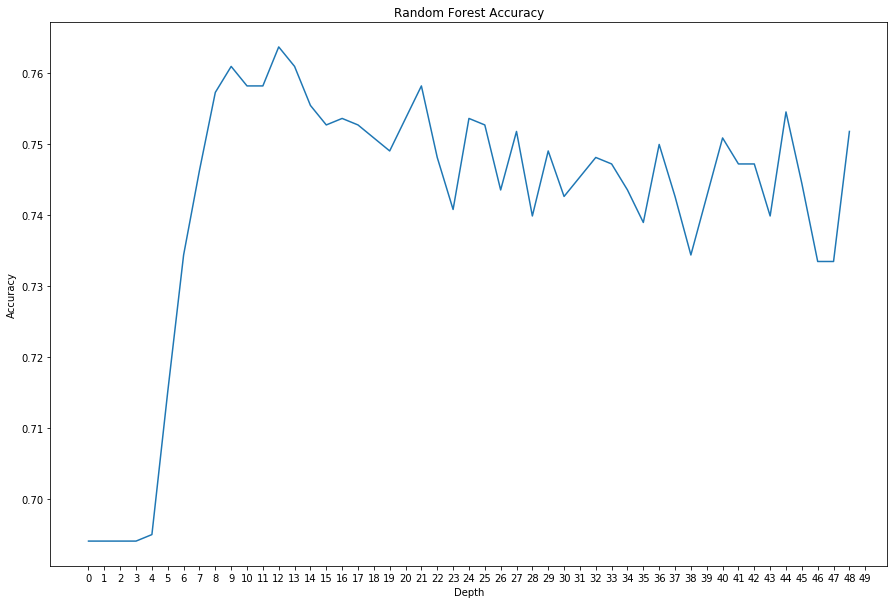

In [11]:
from sklearn.ensemble import RandomForestClassifier

depthAccuracies = []
for i in range(1, 50):
    rfc = RandomForestClassifier(max_depth=i).fit(trainData, trainAns)
    rfcPrediction = rfc.predict(testData)
    depthAccuracies.append(metrics.accuracy_score(testAns, rfcPrediction))
        
plt.figure(figsize=(15,10))
plt.plot(depthAccuracies)
plt.xticks(np.arange(50))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

#### N Stimators
As observed in the plot below, increasing the stimators to some threshold will increase the accuracy because it would increase the amount of models which are helping us predicting the answer. After a certain threshold, the accuracy will change arbitrarily while increasing the stimators.

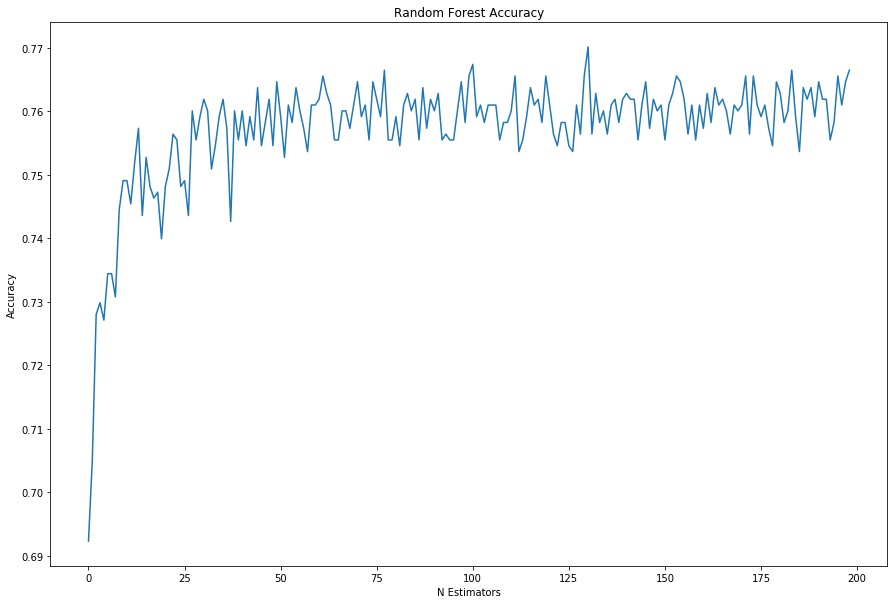

In [12]:
estimatorAccuracies = []
for i in range(1, 200):
    rfc = RandomForestClassifier(max_depth=depthAccuracies.index(max(depthAccuracies))+1, n_estimators=i).fit(trainData, trainAns)
    rfcPrediction = rfc.predict(testData)
    estimatorAccuracies.append(metrics.accuracy_score(testAns, rfcPrediction))
        
plt.figure(figsize=(15,10))
plt.plot(estimatorAccuracies)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

In [13]:
rfc = RandomForestClassifier(max_depth=depthAccuracies.index(max(depthAccuracies))+1, n_estimators=estimatorAccuracies.index(max(estimatorAccuracies))+1).fit(trainData, trainAns)
rfcPrediction = rfc.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, rfcPrediction))
print('Precision:', metrics.precision_score(testAns, rfcPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, rfcPrediction, average='weighted'))

Accuracy:  0.76007326007326
Precision: 0.7530728530728531
Recall:    0.76007326007326


### Bagging Impact on Overfitting
As observed in the results, bagging will decrease the effect of overfitting. As mentioned earlier, in bagging methods, multiple trees are build using greedy method. Bagging takes the advantage of ensemble learning wherein multiple weak learner outperform a single strong learner. It helps reduce variance and thus helps us avoid overfitting.

In [14]:
overfitting = DecisionTreeClassifier(max_depth=20, random_state=0).fit(trainData, trainAns)
overfittingPrediction = overfitting.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, overfittingPrediction))

overfittingBagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, random_state=0)).fit(trainData, trainAns)
overfittingBaggingPrediction = knnBagging.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, overfittingBaggingPrediction))

Accuracy:  0.6840659340659341
Accuracy:  0.7353479853479854


### Bootstrapping
Bootstrapping is a sampling technique. Out of the n samples available, k samples are chosen with replacement. We then run our learning algorithm on each of these samples. The point of sampling with replacement is to make the re-sampling truly random. If done without replacement, the samples drawn will be dependent on the previous ones and thus not be random. Thus, bootstrapping induces bias and hence reduces variance.

### Hard Voting

In [15]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('dtc', dtc), ('knn', knn), ('logreg', logreg)], voting='hard').fit(trainData, trainAns)
votingPrediction = voting.predict(testData)
print('Accuracy: ', metrics.accuracy_score(testAns, votingPrediction))
print('Precision:', metrics.precision_score(testAns, votingPrediction, average='weighted'))
print('Recall:   ', metrics.recall_score(testAns, votingPrediction, average='weighted'))

Accuracy:  0.7628205128205128
Precision: 0.7512012510637638
Recall:    0.7628205128205128


## Conclusion
In the first phase, all three methods accuracies and precisions were mostly the same. Bagging methods didn't work properly because overfitting was prevented in phase 1 and bagging increases the bais. However, random forest method performance was better.<br>
At last, hard voting also didn't make much difference because the results from the three methods implemented were very close and hard voting couldn't improve our model.<br>
As a result, none of the the ensemble learning methods improved our model much and even decreased the accuracy and precision in some methods.